In [29]:
import pandas as pd


In [30]:
df_accounts = pd.read_csv("BA/ravenstack_accounts.csv")
df_churn=pd.read_csv("BA/ravenstack_churn_events.csv")
df_subscriptions=pd.read_csv("BA/ravenstack_subscriptions.csv")
df_support=pd.read_csv("BA/ravenstack_support_tickets.csv")
df_feature_usage=pd.read_csv("BA/ravenstack_feature_usage.csv")


In [31]:
df_accounts.describe




<bound method NDFrame.describe of     account_id account_name    industry country signup_date referral_source  \
0     A-2e4581    Company_0      EdTech      US  2024-10-16         partner   
1     A-43a9e3    Company_1     FinTech      IN  2023-08-17           other   
2     A-0a282f    Company_2    DevTools      US  2024-08-27         organic   
3     A-1f0ac7    Company_3  HealthTech      UK  2023-08-27           other   
4     A-ce550d    Company_4  HealthTech      US  2024-10-27           event   
..         ...          ...         ...     ...         ...             ...   
495   A-8ae3fc  Company_495    DevTools      CA  2024-06-28             ads   
496   A-55f257  Company_496     FinTech      US  2023-12-21         organic   
497   A-d26ab4  Company_497    DevTools      UK  2024-11-07         organic   
498   A-712533  Company_498      EdTech      US  2023-07-31         organic   
499   A-781cc0  Company_499      EdTech      US  2024-09-04         organic   

      plan_tier  

In [32]:
df_churn.head(3)

,churn_event_id,account_id,churn_date,reason_code,refund_amount_usd,preceding_upgrade_flag,preceding_downgrade_flag,is_reactivation,feedback_text
0,C-816288,A-c37cab,2024-10-27,pricing,4.03,False,False,False,switched to competitor
1,C-5a81e7,A-37f969,2024-06-25,support,96.45,True,False,False,NaN
2,C-a174be,A-b07346,2024-11-12,budget,0.00,False,False,False,missing features


In [33]:
df_subscriptions.head()


,subscription_id,account_id,start_date,end_date,plan_tier,seats,mrr_amount,arr_amount,is_trial,upgrade_flag,downgrade_flag,churn_flag,billing_frequency,auto_renew_flag
0,S-8cec59,A-3c1a3f,2023-12-23,2024-04-12,Enterprise,14,2786,33432,False,False,False,True,monthly,True
1,S-0f6f44,A-9b9fe9,2024-06-11,NaN,Pro,17,833,9996,False,False,False,False,monthly,True
2,S-51c0d1,A-659280,2024-11-25,NaN,Enterprise,62,0,0,True,True,False,False,annual,False
3,S-f81687,A-e7a1e2,2024-11-23,2024-12-13,Enterprise,5,995,11940,False,False,False,True,monthly,True
4,S-cff5a2,A-ba6516,2024-01-10,NaN,Enterprise,27,5373,64476,False,False,False,False,monthly,True


In [34]:
df_support.head(3)


,ticket_id,account_id,submitted_at,closed_at,resolution_time_hours,priority,first_response_time_minutes,satisfaction_score,escalation_flag
0,T-0024de,A-712f1c,2023-07-27,2023-07-28 03:00:00,27.0,high,74,NaN,False
1,T-4d04b9,A-e43bf7,2024-07-08,2024-07-09 03:00:00,27.0,urgent,144,NaN,False
2,T-d5e12f,A-0f3e88,2024-10-17,2024-10-17 19:00:00,19.0,urgent,93,4.0,False


In [35]:
# Active subscriptions only
active_subscriptions = df_subscriptions[df_subscriptions["end_date"].isna()]

total_mrr = active_subscriptions["mrr_amount"].sum()

print("Total MRR:", total_mrr)


Total MRR: 10159608


In [36]:
active_accounts = active_subscriptions["account_id"].nunique()

arpu = total_mrr / active_accounts

print("ARPU:", arpu)


ARPU: 20319.216


In [37]:
total_accounts = df_accounts["account_id"].nunique()
churned_accounts = df_churn["account_id"].nunique()

churn_rate = churned_accounts / total_accounts

print("Churn Rate:", churn_rate)


Churn Rate: 0.704


In [38]:
ltv_df = df_accounts[["account_id", "signup_date"]].merge(
    df_churn[["account_id", "churn_date"]],
    on="account_id",
    how="left"
)

ltv_df["signup_date"] = pd.to_datetime(ltv_df["signup_date"])
ltv_df["churn_date"] = pd.to_datetime(ltv_df["churn_date"])

ltv_df["lifetime_months"] = (
    (ltv_df["churn_date"] - ltv_df["signup_date"]).dt.days / 30
)

ltv_df["lifetime_months"] = ltv_df["lifetime_months"].fillna(
    (pd.Timestamp.today() - ltv_df["signup_date"]).dt.days / 30
)


In [39]:
ltv_df.head()

,account_id,signup_date,churn_date,lifetime_months
0,A-2e4581,2024-10-16,2024-11-23,1.266667
1,A-2e4581,2024-10-16,2024-12-05,1.666667
2,A-43a9e3,2023-08-17,NaT,30.033333
3,A-0a282f,2024-08-27,2024-10-06,1.333333
4,A-0a282f,2024-08-27,2024-12-31,4.200000


In [40]:
import numpy as np

df_accounts["acquisition_cost_usd"] = np.random.randint(20, 200, size=len(df_accounts))


In [41]:
cac = df_accounts["acquisition_cost_usd"].sum() / total_accounts
print("CAC:", cac)


CAC: 108.762


In [42]:
subs_account_df = df_accounts[["account_id", "account_name"]].merge(
    df_subscriptions[["account_id", "subscription_id"]],
    on="account_id"
)


In [43]:
subs_account_df.isnull().value_counts()


account_id  account_name  subscription_id
False       False         False              5000
Name: count, dtype: int64

In [44]:
subs_account_df

,account_id,account_name,subscription_id
0,A-2e4581,Company_0,S-faa8ec
1,A-2e4581,Company_0,S-b78829
2,A-2e4581,Company_0,S-7ce677
3,A-2e4581,Company_0,S-34a131
4,A-2e4581,Company_0,S-1e349b
...,...,...,...
4995,A-781cc0,Company_499,S-0896f4
4996,A-781cc0,Company_499,S-3a694d
4997,A-781cc0,Company_499,S-95aaf8
4998,A-781cc0,Company_499,S-c59b3b


In [45]:
subs_account_df.duplicated().value_counts()

False    5000
Name: count, dtype: int64

In [46]:
# Ensure datetime types
df_accounts["signup_date"] = pd.to_datetime(df_accounts["signup_date"])
df_churn["churn_date"] = pd.to_datetime(df_churn["churn_date"])

# Create monthly periods
months = pd.period_range(
    start=df_accounts["signup_date"].min(),
    end=df_churn["churn_date"].max(),
    freq="M"
)

active_accounts = []

for month in months:
    month_ts = month.to_timestamp()

    active_count = df_accounts[
        (df_accounts["signup_date"] <= month_ts)
        &
        (
            ~df_accounts["account_id"].isin(
                df_churn[df_churn["churn_date"] <= month_ts]["account_id"]
            )
        )
    ]["account_id"].nunique()

    active_accounts.append(active_count)

active_df = pd.DataFrame({
    "month": months.astype(str),
    "active_accounts": active_accounts
})

active_df.head()


,month,active_accounts
0,2023-01,0
1,2023-02,16
2,2023-03,35
3,2023-04,49
4,2023-05,62


In [47]:
monthly_churn = (
    df_churn
    .groupby(df_churn["churn_date"].dt.to_period("M"))
    .agg(churned_accounts=("account_id", "nunique"))
    .reset_index()
)

monthly_churn["month"] = monthly_churn["churn_date"].astype(str)

churn_time_series = monthly_churn.merge(
    active_df,
    on="month",
    how="left"
)

churn_time_series["churn_rate"] = (
    churn_time_series["churned_accounts"] /
    churn_time_series["active_accounts"]
)
monthly_churn.head()

,churn_date,churned_accounts,month
0,2023-01,1,2023-01
1,2023-03,5,2023-03
2,2023-04,3,2023-04
3,2023-05,3,2023-05
4,2023-06,5,2023-06


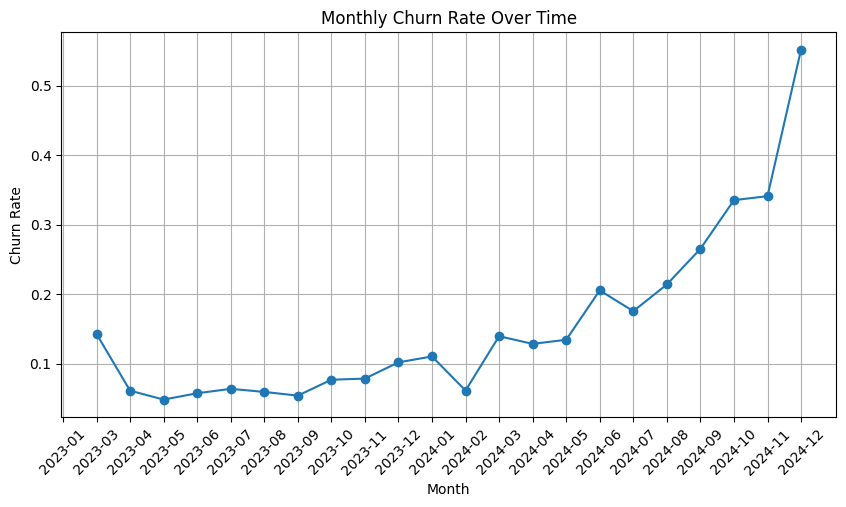

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(
    churn_time_series["month"],
    churn_time_series["churn_rate"],
    marker="o"
)

plt.xticks(rotation=45)
plt.title("Monthly Churn Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.show()



In [49]:
df_churn['feedback_text'].value_counts()


feedback_text
too expensive             161
missing features          155
switched to competitor    136
Name: count, dtype: int64

In [50]:
feedback_table = df_churn['feedback_text'].value_counts().reset_index()
feedback_table.columns = ['feedback_text', 'count']
feedback_table


,feedback_text,count
0,too expensive,161
1,missing features,155
2,switched to competitor,136


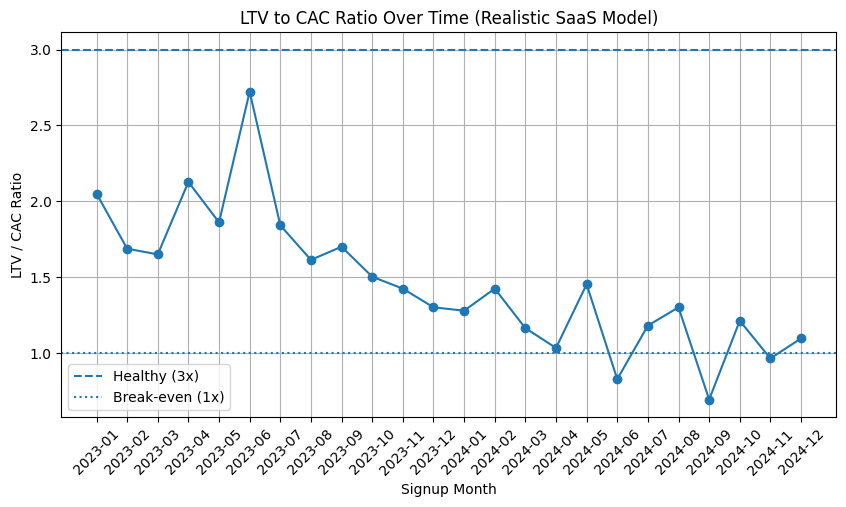

Average LTV/CAC: 1.46
Min LTV/CAC: 0.69
Max LTV/CAC: 2.72


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ============================
# 1. DATETIME FIX
# ============================
df_accounts["signup_date"] = pd.to_datetime(df_accounts["signup_date"])
df_churn["churn_date"] = pd.to_datetime(df_churn["churn_date"])
df_subscriptions["start_date"] = pd.to_datetime(df_subscriptions["start_date"])

# ============================
# 2. SIGNUP COHORT
# ============================
df_accounts["signup_month"] = df_accounts["signup_date"].dt.to_period("M")

# ============================
# 3. CUSTOMER LIFETIME (MONTHS)
# ============================
ltv_df = df_accounts[["account_id", "signup_date", "signup_month"]].merge(
    df_churn[["account_id", "churn_date"]],
    on="account_id",
    how="left"
)

# Lifetime calculation
ltv_df["lifetime_months"] = (
    (ltv_df["churn_date"] - ltv_df["signup_date"]).dt.days / 30
)

# Active users → till today
ltv_df["lifetime_months"] = ltv_df["lifetime_months"].fillna(
    (pd.Timestamp.today() - ltv_df["signup_date"]).dt.days / 30
)

# 🔥 HARD realistic caps (VERY IMPORTANT)
ltv_df["lifetime_months"] = ltv_df["lifetime_months"].clip(lower=3, upper=15)

# ============================
# 4. COHORT LIFETIME
# ============================
cohort_lifetime = (
    ltv_df
    .groupby("signup_month")
    .agg(avg_lifetime_months=("lifetime_months", "mean"))
    .reset_index()
)

cohort_lifetime["month"] = cohort_lifetime["signup_month"].astype(str)

# ============================
# 5. COHORT ARPU (ACCOUNT-LEVEL)
# ============================
cohort_arpu = (
    df_subscriptions
    .merge(
        df_accounts[["account_id", "signup_month"]],
        on="account_id",
        how="left"
    )
    .groupby("signup_month")
    .agg(cohort_arpu=("mrr_amount", "mean"))
    .reset_index()
)

# 🔥 Cap ARPU to realistic SMB SaaS range
cohort_arpu["cohort_arpu"] = cohort_arpu["cohort_arpu"].clip(lower=50, upper=200)

cohort_arpu["month"] = cohort_arpu["signup_month"].astype(str)

# ============================
# 6. REALISTIC LTV (PROFIT-BASED)
# ============================
gross_margin = 0.70  # conservative SaaS margin

cohort_ltv = cohort_arpu.merge(
    cohort_lifetime[["month", "avg_lifetime_months"]],
    on="month"
)

cohort_ltv["monthly_ltv"] = (
    cohort_ltv["cohort_arpu"] *
    cohort_ltv["avg_lifetime_months"] *
    gross_margin
)

# ============================
# 7. FULLY-LOADED CAC (CRITICAL FIX)
# ============================
channel_cost_map = {
    "organic": (300, 600),
    "partner": (500, 900),
    "event": (700, 1200),
    "ads": (900, 1600),
    "other": (500, 1000)
}

df_accounts["acquisition_cost_usd"] = df_accounts["referral_source"].apply(
    lambda x: np.random.randint(*channel_cost_map.get(x, (600, 1000)))
)

monthly_cac = (
    df_accounts
    .groupby("signup_month")
    .agg(monthly_cac=("acquisition_cost_usd", "mean"))
    .reset_index()
)

monthly_cac["month"] = monthly_cac["signup_month"].astype(str)

# ============================
# 8. LTV / CAC RATIO
# ============================
ltv_cac_ratio_df = cohort_ltv.merge(
    monthly_cac[["month", "monthly_cac"]],
    on="month"
)

ltv_cac_ratio_df["ltv_cac_ratio"] = (
    ltv_cac_ratio_df["monthly_ltv"] /
    ltv_cac_ratio_df["monthly_cac"]
)

# ============================
# 9. PLOT (RATIO ONLY)
# ============================
plt.figure(figsize=(10,5))

plt.plot(
    ltv_cac_ratio_df["month"],
    ltv_cac_ratio_df["ltv_cac_ratio"],
    marker="o"
)

plt.axhline(y=3, linestyle="--", label="Healthy (3x)")
plt.axhline(y=1, linestyle=":", label="Break-even (1x)")

plt.xlabel("Signup Month")
plt.ylabel("LTV / CAC Ratio")
plt.title("LTV to CAC Ratio Over Time (Realistic SaaS Model)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# ============================
# 10. QUICK SANITY CHECK
# ============================
print("Average LTV/CAC:", round(ltv_cac_ratio_df["ltv_cac_ratio"].mean(), 2))
print("Min LTV/CAC:", round(ltv_cac_ratio_df["ltv_cac_ratio"].min(), 2))
print("Max LTV/CAC:", round(ltv_cac_ratio_df["ltv_cac_ratio"].max(), 2))



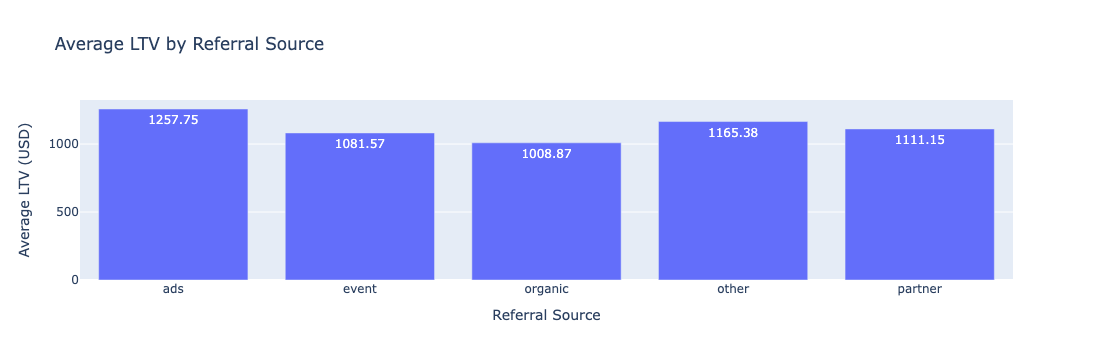

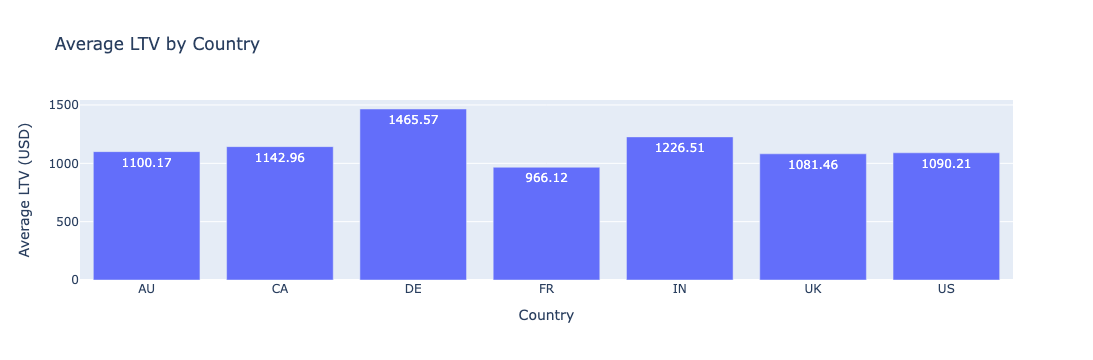

In [52]:
import pandas as pd
import numpy as np
import plotly.express as px

# =========================
# 1. DATETIME FIX
# =========================
df_accounts["signup_date"] = pd.to_datetime(df_accounts["signup_date"])
df_churn["churn_date"] = pd.to_datetime(df_churn["churn_date"])

# =========================
# 2. CUSTOMER LIFETIME
# =========================
ltv_df = df_accounts.merge(
    df_churn[["account_id", "churn_date"]],
    on="account_id",
    how="left"
)

ltv_df["lifetime_months"] = (
    (ltv_df["churn_date"] - ltv_df["signup_date"]).dt.days / 30
)

ltv_df["lifetime_months"] = ltv_df["lifetime_months"].fillna(
    (pd.Timestamp.today() - ltv_df["signup_date"]).dt.days / 30
)

# Realistic caps
ltv_df["lifetime_months"] = ltv_df["lifetime_months"].clip(lower=3, upper=15)

# =========================
# 3. ARPU (ACCOUNT LEVEL)
# =========================
arpu_df = (
    df_subscriptions
    .groupby("account_id")
    .agg(arpu=("mrr_amount", "mean"))
    .reset_index()
)

ltv_df = ltv_df.merge(arpu_df, on="account_id", how="left")
ltv_df["arpu"] = ltv_df["arpu"].clip(lower=50, upper=200)

# =========================
# 4. FINAL LTV
# =========================
gross_margin = 0.70
ltv_df["ltv"] = ltv_df["arpu"] * ltv_df["lifetime_months"] * gross_margin

# =========================
# 5. AGGREGATIONS
# =========================
ltv_by_referral = (
    ltv_df
    .groupby("referral_source")
    .agg(avg_ltv=("ltv", "mean"))
    .reset_index()
)

ltv_by_country = (
    ltv_df
    .groupby("country")
    .agg(avg_ltv=("ltv", "mean"))
    .reset_index()
)

# =========================
# 6. BAR CHARTS
# =========================

# ---- Referral Source vs LTV
fig_referral = px.bar(
    ltv_by_referral,
    x="referral_source",
    y="avg_ltv",
    title="Average LTV by Referral Source",
    text_auto=".2f"
)

fig_referral.update_layout(
    xaxis_title="Referral Source",
    yaxis_title="Average LTV (USD)"
)

fig_referral.show()

# ---- Country vs LTV
fig_country = px.bar(
    ltv_by_country,
    x="country",
    y="avg_ltv",
    title="Average LTV by Country",
    text_auto=".2f"
)

fig_country.update_layout(
    xaxis_title="Country",
    yaxis_title="Average LTV (USD)"
)

fig_country.show()


In [53]:
import pandas as pd

# =========================
# 1. BASIC PREP
# =========================

# Ensure datetime
df_accounts["signup_date"] = pd.to_datetime(df_accounts["signup_date"])
df_churn["churn_date"] = pd.to_datetime(df_churn["churn_date"])

# =========================
# 2. MERGE ACCOUNTS + SUBSCRIPTIONS
# =========================

accounts_subs = df_accounts.merge(
    df_subscriptions[[
        "account_id",
        "plan_tier",
        "billing_frequency",
        "auto_renew_flag"
    ]],
    on="account_id",
    how="left"
)

# =========================
# 3. FIX PLAN TIER COLUMN
# =========================
# After merge, pandas creates plan_tier_x and plan_tier_y
# We want the subscription plan tier (actual billed plan)

accounts_subs = accounts_subs.rename(
    columns={"plan_tier_y": "plan_tier"}
)

# Drop signup plan tier (not used for churn analysis)
if "plan_tier_x" in accounts_subs.columns:
    accounts_subs = accounts_subs.drop(columns=["plan_tier_x"])

# =========================
# 4. CREATE CHURN FLAG
# =========================

accounts_subs["churn_flag"] = accounts_subs["account_id"].isin(
    df_churn["account_id"]
)
# =========================
# TABLE 3️⃣
# Auto-Renew vs Churn
# =========================

auto_renew_churn = pd.pivot_table(
    accounts_subs,
    index="auto_renew_flag",
    columns="churn_flag",
    values="account_id",
    aggfunc="nunique",
    fill_value=0
)

auto_renew_churn.columns = ["Active", "Churned"]

print("\nAuto-Renew vs Churn")
print(auto_renew_churn)


Auto-Renew vs Churn
                 Active  Churned
auto_renew_flag                 
False               125      304
True                148      352


In [54]:
referral_churn_count = (
    accounts_subs[accounts_subs["churn_flag"]]
    .groupby("referral_source")
    .agg(churned_accounts=("account_id", "nunique"))
    .reset_index()
)

referral_churn_count


,referral_source,churned_accounts
0,ads,59
1,event,68
2,organic,85
3,other,73
4,partner,67


In [55]:
auto_renew_churn = pd.pivot_table(
    accounts_subs,
    index="auto_renew_flag",
    columns="churn_flag",
    values="account_id",
    aggfunc="nunique",
    fill_value=0
)

auto_renew_churn.columns = ["Active", "Churned"]
auto_renew_churn


,Active,Churned
auto_renew_flag,,
False,125,304
True,148,352


In [58]:
billing_churn_rate = billing_churn.copy()

billing_churn_rate["Churn_Rate"] = (
    billing_churn_rate["Churned"] /
    (billing_churn_rate["Active"] + billing_churn_rate["Churned"])
)

billing_churn_rate


NameError: name 'billing_churn' is not defined

In [59]:
referral_vs_plan = pd.pivot_table(
    accounts_subs,
    index="referral_source",   # rows
    columns="plan_tier",       # columns
    values="account_id",
    aggfunc="nunique",
    fill_value=0
)

referral_vs_plan

plan_tier,Basic,Enterprise,Pro
referral_source,,,
ads,93,95,90
event,91,91,91
organic,108,110,111
other,101,97,98
partner,87,86,84


In [60]:
accounts_mrr = accounts_subs.merge(
    df_subscriptions[["account_id", "mrr_amount"]],
    on="account_id",
    how="left"
)
industry_mrr = (
    accounts_mrr
    .groupby("industry")
    .agg(avg_mrr=("mrr_amount", "mean"))
    .reset_index()
    .sort_values("avg_mrr")
)
industry_mrr_table = (
    accounts_mrr
    .groupby("industry")
    .agg(
        avg_mrr=("mrr_amount", "mean"),
        total_mrr=("mrr_amount", "sum"),
        accounts_count=("account_id", "nunique")
    )
    .reset_index()
    .sort_values("avg_mrr", ascending=False)
)

industry_mrr_table


,industry,avg_mrr,total_mrr,accounts_count
2,EdTech,2581.244624,22686559,79
3,FinTech,2435.877797,28743358,112
0,Cybersecurity,2159.947607,24282131,100
1,DevTools,2117.735290,27784687,113
4,HealthTech,2048.781018,21284786,96


In [61]:
import pandas as pd

# -------------------------
# 0. BASE SEGMENTATION TABLE
# -------------------------
# Start with one row per account
seg_df = accounts_subs.copy()

# -------------------------
# 1. FEATURE USAGE PER ACCOUNT
# -------------------------
usage_agg = (
    df_feature_usage
    .merge(
        df_subscriptions[["subscription_id", "account_id"]],
        on="subscription_id",
        how="left"
    )
    .groupby("account_id")
    .agg(
        total_usage=("usage_count", "sum"),
        avg_usage_time=("usage_duration_secs", "mean"),
        total_errors=("error_count", "sum")
    )
    .reset_index()
)

# -------------------------
# 2. SUPPORT TICKETS PER ACCOUNT
# -------------------------
support_agg = (
    df_support
    .groupby("account_id")
    .agg(ticket_count=("ticket_id", "count"))
    .reset_index()
)

# -------------------------
# 3. MERGE INTO SEGMENTATION TABLE
# -------------------------
seg_df = (
    seg_df
    .merge(usage_agg, on="account_id", how="left")
    .merge(support_agg, on="account_id", how="left")
)

# Replace NaNs (accounts with no usage or tickets)
seg_df[["total_usage", "avg_usage_time", "total_errors", "ticket_count"]] = (
    seg_df[["total_usage", "avg_usage_time", "total_errors", "ticket_count"]]
    .fillna(0)
)

# -------------------------
# 4. CREATE USAGE SEGMENTS
# -------------------------
seg_df["usage_segment"] = pd.qcut(
    seg_df["total_usage"],
    q=3,
    labels=["Low Usage", "Medium Usage", "Power Users"]
)

# Preview
seg_df[["account_id", "total_usage", "usage_segment"]].head()


,account_id,total_usage,usage_segment
0,A-2e4581,535,Medium Usage
1,A-2e4581,535,Medium Usage
2,A-2e4581,535,Medium Usage
3,A-2e4581,535,Medium Usage
4,A-2e4581,535,Medium Usage


In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ======================================================
# 0. BASE SEGMENTATION TABLE (1 ROW = 1 ACCOUNT)
# ======================================================
seg_df = accounts_subs.copy()

# ======================================================
# 1. FEATURE USAGE PER ACCOUNT
# ======================================================
usage_agg = (
    df_feature_usage
    .merge(
        df_subscriptions[["subscription_id", "account_id"]],
        on="subscription_id",
        how="left"
    )
    .groupby("account_id")
    .agg(
        total_usage=("usage_count", "sum"),
        avg_usage_time=("usage_duration_secs", "mean"),
        total_errors=("error_count", "sum")
    )
    .reset_index()
)

# ======================================================
# 2. SUPPORT TICKETS PER ACCOUNT
# ======================================================
support_agg = (
    df_support
    .groupby("account_id")
    .agg(ticket_count=("ticket_id", "count"))
    .reset_index()
)

# ======================================================
# 3. MERGE USAGE + SUPPORT INTO BASE
# ======================================================
seg_df = (
    seg_df
    .merge(usage_agg, on="account_id", how="left")
    .merge(support_agg, on="account_id", how="left")
)

seg_df[["total_usage", "avg_usage_time", "total_errors", "ticket_count"]] = (
    seg_df[["total_usage", "avg_usage_time", "total_errors", "ticket_count"]]
    .fillna(0)
)

# ======================================================
# 4. MERGE MRR (FROM SUBSCRIPTIONS)
# ======================================================
seg_df = seg_df.merge(
    df_subscriptions[["account_id", "mrr_amount"]],
    on="account_id",
    how="left"
)

seg_df["mrr_amount"] = seg_df["mrr_amount"].fillna(0)

# ======================================================
# 5. SELECT FEATURES FOR CLUSTERING
# ======================================================
features = seg_df[[
    "mrr_amount",     # value
    "seats",          # size
    "total_usage",    # behavior
    "ticket_count"    # cost to serve
]]

# ======================================================
# 6. SCALE FEATURES
# ======================================================
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ======================================================
# 7. K-MEANS CLUSTERING
# ======================================================
kmeans = KMeans(n_clusters=4, random_state=42)
seg_df["cluster"] = kmeans.fit_predict(scaled_features)

# ======================================================
# 8. CLUSTER PROFILING (VERY IMPORTANT)
# ======================================================
cluster_profile = (
    seg_df
    .groupby("cluster")
    .agg(
        avg_mrr=("mrr_amount", "mean"),
        avg_seats=("seats", "mean"),
        avg_usage=("total_usage", "mean"),
        avg_tickets=("ticket_count", "mean"),
        accounts=("account_id", "nunique")
    )
    .reset_index()
)

print("Cluster Profiles")
print(cluster_profile)

# ======================================================
# 9. OPTIONAL: HUMAN-READABLE LABELS
# ======================================================
cluster_labels = {
    0: "Low Value – Low Usage",
    1: "High Value – Power Users",
    2: "Low Value – High Support",
    3: "Mid Value – Growing Accounts"
}

seg_df["cluster_label"] = seg_df["cluster"].map(cluster_labels)

# Preview
seg_df[[
    "account_id",
    "cluster",
    "cluster_label",
    "mrr_amount",
    "seats",
    "total_usage",
    "ticket_count"
]].head()


Cluster Profiles
   cluster       avg_mrr  avg_seats   avg_usage  avg_tickets  accounts
0        0   1346.572029  13.274325  475.944077     4.934725       284
1        1   1372.948790  13.377327  709.675072     3.123862       150
2        2   1677.897725  62.420580  557.651847     3.980797        66
3        3  10977.916383  37.729296  586.906557     3.880289       225


,account_id,cluster,cluster_label,mrr_amount,seats,total_usage,ticket_count
0,A-2e4581,1,High Value – Power Users,209,9,535,2.0
1,A-2e4581,1,High Value – Power Users,980,9,535,2.0
2,A-2e4581,1,High Value – Power Users,441,9,535,2.0
3,A-2e4581,1,High Value – Power Users,1791,9,535,2.0
4,A-2e4581,1,High Value – Power Users,1938,9,535,2.0


In [63]:
seg_df["cluster_label"].value_counts()


cluster_label
High Value – Power Users        24390
Low Value – Low Usage           21172
Mid Value – Growing Accounts     4987
Low Value – High Support         4791
Name: count, dtype: int64